# **Question 2**

## **Regression**:

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

In [4]:
from google.colab import files
uploaded = files.upload()

Saving A2Q2Data_test.csv to A2Q2Data_test.csv
Saving A2Q2Data_train.csv to A2Q2Data_train.csv


### Managing Train and test datas:

In [5]:
train = pd.read_csv('A2Q2Data_train.csv')
test = pd.read_csv('A2Q2Data_test.csv')

df2 = pd.DataFrame([dict(zip([col for col in train.columns], [col for col in train.columns]))])
train = pd.concat([df2,train], ignore_index = True)

X_train = train.iloc[:, 0:100].to_numpy()
y_train = train.iloc[:, 100].to_numpy()
X_train[0] = np.array([float(x) for x in X_train[0]])
y_train [0] = float(y_train[0])
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((X_train,ones))
y_train = y_train.reshape(10000,1)

In [6]:
df3 = pd.DataFrame([dict(zip([col for col in test.columns], [col for col in test.columns]))])

test = pd.concat([df3,test], ignore_index = True)

X_test = test.iloc[:, 0:100].to_numpy()
y_test = test.iloc[:, 100].to_numpy()
X_test[0] = np.array([float(x) for x in X_test[0]])
y_test[0] = float(y_test[0])
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_test,ones_test))
y_test = y_test.reshape(X_test.shape[0],1)

### Using basic matrix Equation [ *Analytical Solution using Derivation of W_ml* ]



In [8]:
w_ml = ((np.linalg.inv(X_train.T @ X_train)) @ X_train.T ) @ y_train

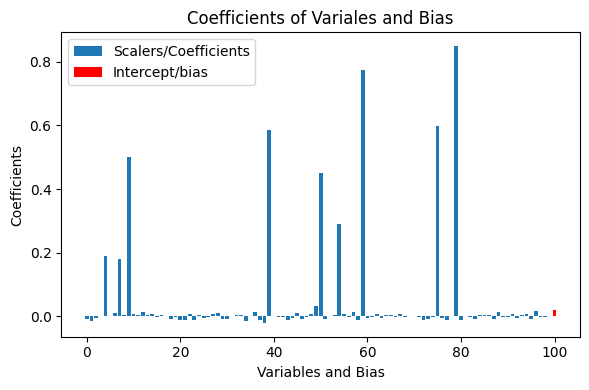

In [95]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(range(0,99),[w[0] for w in w_ml[0:99].tolist()])
ax.bar(100,w_ml[100].tolist(), color = 'red')
plt.title("Coefficients of Variales and Bias")
ax.set_xlabel('Variables and Bias')
ax.set_ylabel('Coefficients')
plt.legend({'Scalers/Coefficients':'0','Intercept/bias':'1'})

In [10]:
def cost(X,w,y):                              # Defining cost
    return (np.linalg.norm(X @ w - y))**2

In [116]:
def R_sq(X,w,y):
    cost_r = cost(X,w,y)
    y_mean = np.mean(y)
    mean_sq_error = 0

    for i in range(y.shape[0]):
        mean_sq_error += (y[i] - y_mean)**2

    print(mean_sq_error)
    print(cost_r)
    return (((mean_sq_error - cost_r)/mean_sq_error) * 100)

### Gradient Descent

In [9]:
def gradient(X,w,y):
    n = np.shape(X)[0]
    gradient_val = (2/n)*((X.T @ X) @ w - X.T @ y)
    return(gradient_val)

In [101]:
def gradient_descent(X,y,no_of_epochs, alpha):
    w = np.zeros((X.shape[1],1))
    cost_gradient_descent = []
    diff_from_w_ml = []

    for epoch in range(no_of_epochs):
        grad = gradient(X_train, w, y_train)
        w = w - alpha*grad
        cost_gradient_descent.append(cost(X_train,w,y_train))
        diff_from_w_ml.append(np.linalg.norm(w - w_ml))

    #Plot for w-w_ml vs epoch
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_w_ml)
    ax.set_xlabel('iteration')
    ax.set_ylabel('||MLE||2')

    #Plot for error in each iteration
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_gradient_descent)
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('Δ Error')
    print(diff_from_w_ml[-1])
    return w

0.3134321943474898


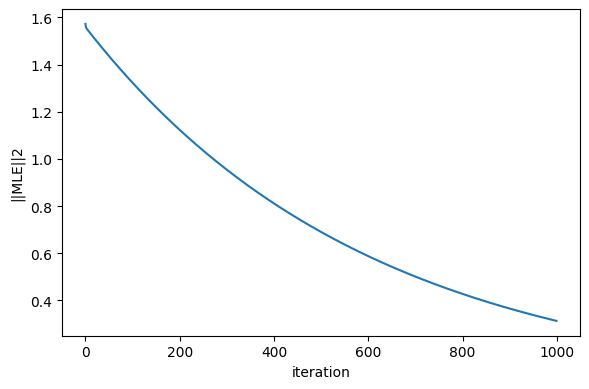

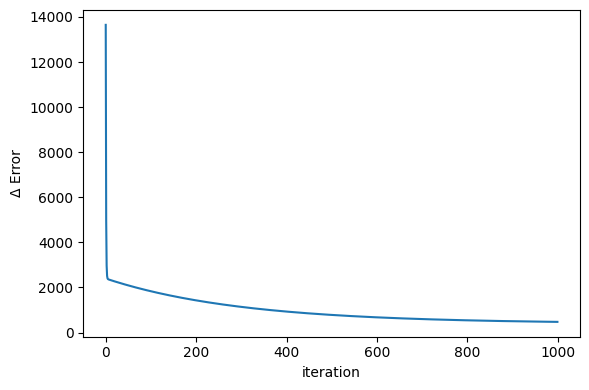

In [102]:
w_gd = gradient_descent(X_train, y_train, 1000, 1e-2)

In [117]:
print("cost mlt train:",cost(X_train, w_ml, y_train))
print("cost ml test:",cost(X_test, w_ml, y_test))
print("R sq err ml test:",R_sq(X_test, w_ml, y_test))
print(" ")
print("cost gd:",cost(X_train, w_gd, y_train))
print("cost gd:",cost(X_test, w_gd, y_test))
print("R sq err gd test:",R_sq(X_test, w_gd, y_test))

cost mlt train: 396.85210962198335
cost ml test: 185.375750537584
[113.77624]
185.375750537584
R sq err ml test: [-62.930107]
 
cost gd: 472.51052247767205
cost gd: 155.55303127788213
[113.77624]
155.55303127788213
R sq err gd test: [-36.718376]


### Stochastic Gradient Descent

In [99]:
def SGD(X, y, batch_size, no_of_epochs, learning_rate):
    data = np.hstack((X, y))
    n = data.shape[0]
    d = X.shape[1]

    n_batches = int(n/batch_size)
    w_iter = np.zeros((no_of_epochs,d)) #List containing w_i in each iteration
    cost_list = []
    diff_from_wml = []
    w_sgd = np.zeros((X.shape[1],1))
    for i in range(no_of_epochs):
        idx = np.random.randint(data.shape[0], size =  batch_size) #Choosing random list of Batch size
        batch = data[idx,:]
        X_batch = batch[:, 0:data.shape[1]-1]
        y_batch = batch[:, data.shape[1]-1]
        y_batch = y_batch.reshape((batch_size, 1))
        grad = gradient(X_batch, w_sgd, y_batch)
        w_sgd = w_sgd - (learning_rate)*grad
        diff_from_wml.append((np.linalg.norm(w_sgd - w_ml))**2)
        cost_list.append(cost(X_batch, w_sgd, y_batch))
        w_iter[i] = w_sgd.T

    #Plot for w-w_ml vs epoch
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_wml)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('||MLE||2')

    #Plot for error in each iteration
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_list)
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('Δ Error')
    w_sgd_avg = np.mean(w_iter, axis = 0)
    return w_sgd

cost sgd train : 471.0785349470669
cost sgd test: 155.54034805441407
[113.77624]
155.54034805441407
R sq err sgd test: [-36.70723]


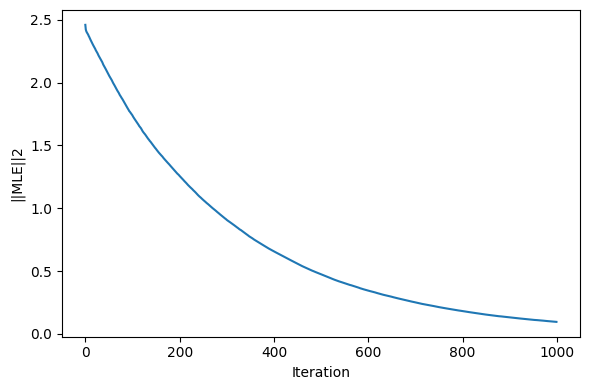

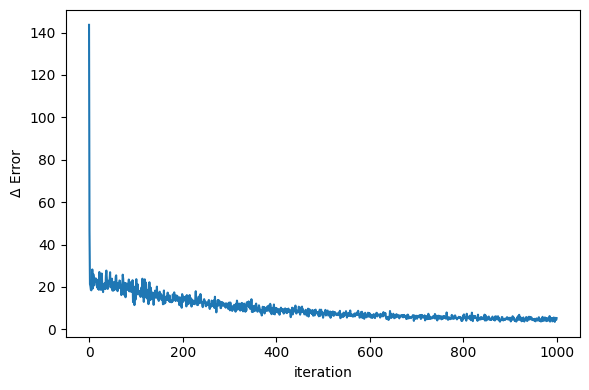

In [118]:
w_sgd_avg = SGD(X_train, y_train, 100, 1000, 1e-2)

print("cost sgd train :",cost(X_train, w_sgd_avg, y_train))
print("cost sgd test:" ,cost(X_test,w_sgd_avg,y_test))
print("R sq err sgd test:",R_sq(X_test, w_sgd_avg, y_test))

### Ridge Regression

In [19]:
#New gradient term due to regularisation
def l2_gradient(X, y, w, l2_penalty):
    n = X.shape[0]
    d = X.shape[1]
    return (2/n)*(((X.T @ X + np.identity(d)*l2_penalty) @ w) - (X.T @ y))

In [96]:
def ridge_regression(X,y,l2_penalty, learning_rate, number_of_epochs):
    w = np.zeros((X.shape[1],1))
    diff_from_wml = []
    cost_ridge = []

    for epoch in range(number_of_epochs):
        grad = l2_gradient(X = X, y = y, w = w, l2_penalty = l2_penalty)
        w = w - learning_rate*grad
        diff_from_wml.append(np.linalg.norm(w - w_ml))
        cost_ridge.append(cost(X = X, y = y, w = w))

    #mod MLE vs episodes
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(diff_from_wml)
    ax.set_title('Ridge Regression')
    ax.set_xlabel('iteration')
    ax.set_ylabel('||MLE||2')


    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2.plot(cost_ridge)

    ax2.set_xlabel('iteration')
    ax2.set_ylabel('Δ Error')
    return w

473.4368228883739
155.38913236299499


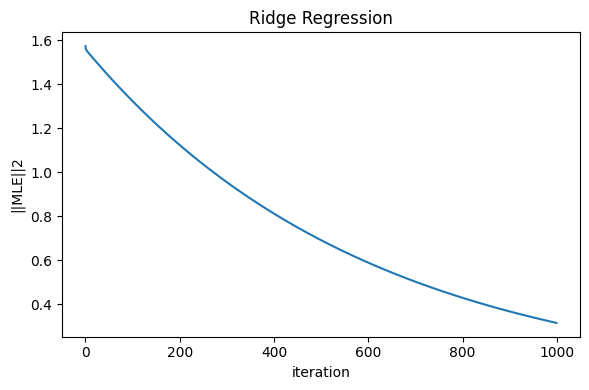

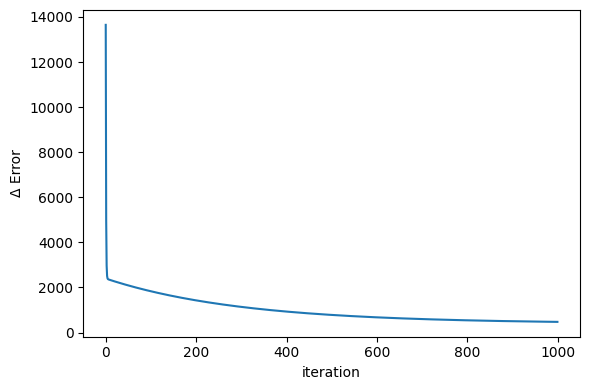

In [120]:
wrr = ridge_regression(X = X_train, y = y_train, learning_rate = 1e-2, l2_penalty = 2.028, number_of_epochs = 1000)
print(cost(X = X_train, y = y_train, w = wrr))
print(cost(X = X_test, y = y_test, w = wrr))

> K Fold Method - Cross validation

In [22]:
def kfoldMethod(X,y,number_of_epochs, k):
    n = X.shape[0]
    d = X.shape[1]
    fold_size = int(n/k)
    min_avg_cost = -1
    optimal_penalty = 0
    l2_penalties = np.linspace(0.01,10, 100)
    costs = []

    for l2_penalty in l2_penalties:
        sum_cost = 0

        for i in range(k):
            train_idx = [j1 for j1 in range(i*fold_size)] + [j2 for j2 in range((i+1)*fold_size, n)]
            X_test_fold = X[i*fold_size : (i+1)*fold_size,:]
            y_test_fold = y[i*fold_size : (i+1)*fold_size,:]
            X_train_fold = X[train_idx, :]
            y_train_fold = y[train_idx, :]
            y_test_fold.reshape((fold_size, 1))
            y_train_fold.reshape((n-fold_size, 1))

            w_r_train = (np.linalg.inv((X_train_fold.T @ X_train_fold) + l2_penalty*np.identity(101)) @ X_train_fold.T) @ y_train_fold
            sum_cost = sum_cost + cost(X_test_fold, w_r_train, y_test_fold)

        avg_cost = sum_cost/k

        costs.append(avg_cost)

        if(min_avg_cost == -1):
            min_avg_cost = avg_cost
            optimal_penalty = l2_penalty
        elif(min_avg_cost >= avg_cost):
            min_avg_cost = avg_cost
            optimal_penalty = l2_penalty

    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.scatter(l2_penalties, costs)
    ax.set_title('Ridge Regression')
    ax.set_xlabel('λ')
    ax.set_ylabel('Average error')
    return optimal_penalty

1.7254545454545454


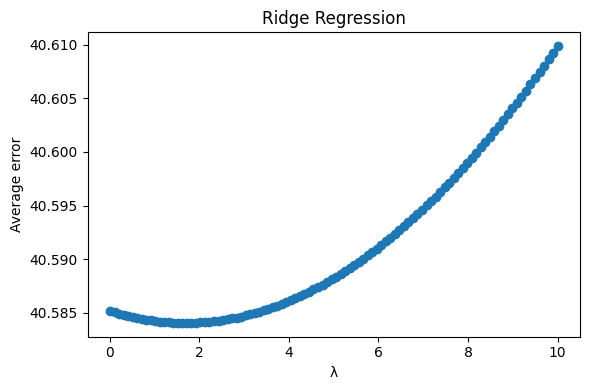

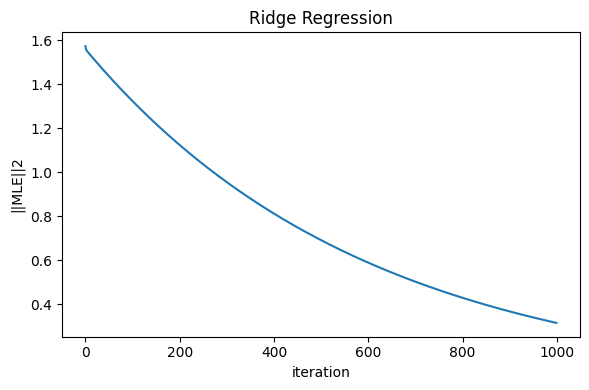

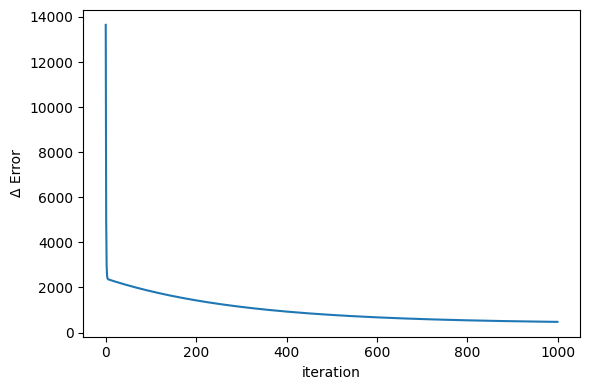

In [98]:
optimum_penalty = kfoldMethod(X_train, y_train, 1000, 10)
print(optimum_penalty)
wrr = ridge_regression(X = X_train, y = y_train, learning_rate = 1e-2, l2_penalty = optimum_penalty, number_of_epochs = 1000)

In [24]:
print(cost(X_train, wrr, y_train))
print(cost(X_train, w_gd, y_train))
print(cost(X_test, w_ml, y_test))
print(cost(X_test, w_gd, y_test))
print(cost(X_test, wrr, y_test))

473.2984007988663
472.51052247767205
185.375750537584
155.55303127788213
155.41354208895768


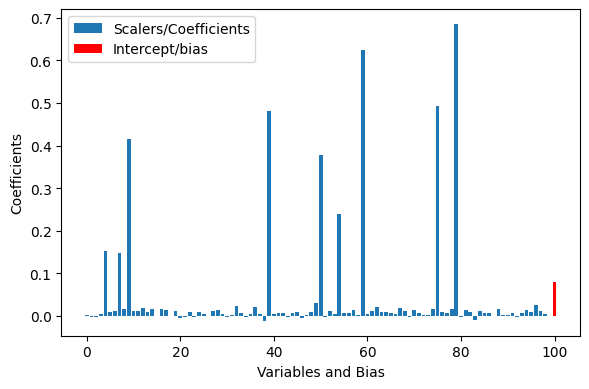

In [87]:

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(range(0,99),[w[0] for w in wrr[0:99].tolist()])

ax.bar(100,wrr[100].tolist(), color = 'red')

ax.set_xlabel('Variables and Bias')
ax.set_ylabel('Coefficients')
plt.legend({'Scalers/Coefficients':'0','Intercept/bias':'1'})